In [245]:
import sys
if "CanonicalForms" in sys.modules.keys():
    del sys.modules["CanonicalForms"]

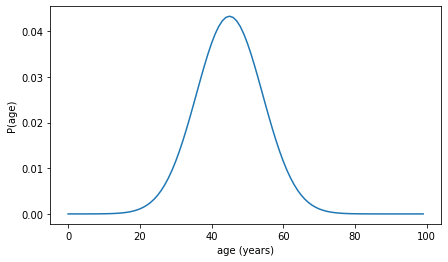

In [253]:
import CanonicalForms as cf
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (7,4)

# Let's model a population with people of different ages as being gaussian distributed.
variance = 85
mean = 45

# CanonicalForms uses analytic expressions to compute various properties of the factor.
ageFactor = cf.Canon.fromUniVariateGaussian("age", mean, variance)


ageDomain = np.arange(0, 100, 1)

plt.plot(ageDomain, [ageFactor.evaluatePDF({"age":x}) for x in ageDomain])
plt.ylabel("P(age)")
plt.xlabel("age (years)");

plt.savefig("ageDistribution.png", facecolor="w")

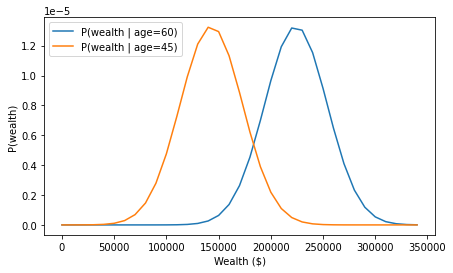

In [255]:
# This by itself is not very interesting, however we can now add a dependent variable to the model.
# Let's say that a persons wealth is dependent on their age in a linear fashion,
# e.g. person.wealth = w * person.age + µ + N(0, sigma)
# We call the distribution of wealth a linear gaussian conditional probability distribution, or linear gaussian CPD for short.

# CanonicalForms can model these dependencies in a smart way:

wealth_Given_Age_Factor = cf.Canon.fromLinearGaussianCPD(
    variableName="wealth", # The name of the variable we are modeling
    parentName="age",      # The name of the variable that affects our mean
    meanBias=-100000,      # µ
    parentFactor = 5400,   # w
    variance=30000**2      # sigma^2
)


wealthDomain = np.arange(0, 350000, 10000)
# we use the variable names to give 'evidence' to the factor, i.e. we 'collapse' the outcome space to a single state.
plt.plot(wealthDomain, [wealth_Given_Age_Factor.evaluatePDF({"wealth":x, "age":60}) for x in wealthDomain], label = "P(wealth | age=60)")
plt.plot(wealthDomain, [wealth_Given_Age_Factor.evaluatePDF({"wealth":x, "age":45}) for x in wealthDomain], label = "P(wealth | age=45)")
plt.legend()
plt.ylabel("P(wealth)")
plt.xlabel("Wealth ($)");

plt.savefig("wealthGivenAgeDistribution.png", facecolor="w")

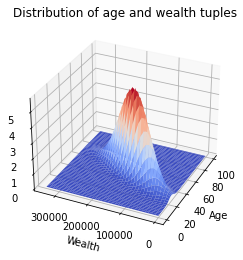

In [262]:
# now let's calculate the average wealth of any person in our modeled population!
# We can do this by multiplying the distribution of wealth by the distribution of age.
# insert bayes rule image
# P(wealth | age) * P(age) = P(wealth, age)
# this is the joint distribution.

age_And_Wealth_Factor = ageFactor * wealth_Given_Age_Factor
# We can plot this one in 3d:

ax = plt.figure().add_subplot(111, projection='3d')
wD, aD = np.meshgrid(wealthDomain, ageDomain)

surf = np.array([age_And_Wealth_Factor.evaluatePDF({"age": a, "wealth":w}) for a in ageDomain for w in wealthDomain]).reshape(aD.shape)

ax.view_init(elev=30, azim=-155)
ax.set_xlabel("Age")
ax.set_ylabel("Wealth")
# ax.set_zlabel("P(wealth, age)")
ax.set_title("Distribution of age and wealth tuples")
ax.plot_surface(aD, wD, surf, cmap=plt.cm.coolwarm)
# plt.show()

# save fig with margin
plt.savefig("ageAndWealthDistribution.png", facecolor="w", bbox_inches="tight") 

In [ ]:
# the mean tuple can be found easily:
print("The mean tuple is:\n", age_And_Wealth_Factor.getMean())

Mean of population wealth: [143000.]
Variance of population wealth: [3.3786e+09]


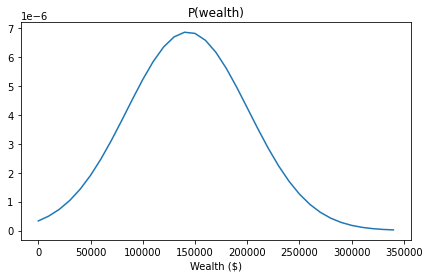

In [271]:
# marginalizing out age, we get the distribution of wealth over the whole population:
wealthFactor = age_And_Wealth_Factor.marginalize(["age"])

# wealthDomain = np.arange(100000, 5000 * 80, 10000)

plt.plot(wealthDomain, [wealthFactor.evaluatePDF({"wealth":x, "age":50}) for x in wealthDomain])
plt.title("P(wealth)")
plt.xlabel("Wealth ($)")

plt.savefig("wealthDistribution.png", facecolor="w")

print("Mean of population wealth:", wealthFactor.getMean().values)
print("Variance of population wealth:", wealthFactor.getCovariance().values.flatten())

In [278]:
# We can also use the joint distribution of age and wealth to infer age, given wealth.

print(age_And_Wealth_Factor.Reduce(evidence={"wealth":130800})getMean().values)
print(age_And_Wealth_Factor.Reduce(evidence={"age":21}).getMean().values)


[[22.64251465]]
[13400.]
